In [1]:
import numpy as np
import pandas as pd

#결측치 채우기 ex imputer=SimpleImputer(strategy="median")
from sklearn.impute import SimpleImputer
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
#변환 파이프라인 : 변환이 연속적으로 잘 처리되도록
from sklearn.pipeline import Pipeline
#데이터 개수 셀 때 : from collections import Counter

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#상관관계 그래프
from pandas.plotting import scatter_matrix

#모델 검증
#K-교차검증
from sklearn.model_selection import cross_val_score #, StratifiedShuffleSplit

#데이터 샘플링-훈련/검증
from sklearn.model_selection import train_test_split
#결정트리
from sklearn.tree import DecisionTreeClassifier

# P 클래스로 보았을 때 정밀도, 재현율, F1점수 구하고 
#그 평균값으로 전체 모형의 성능을 평가
from sklearn.metrics import classification_report

#서포트 벡터 머신 - 적은 데이터
from sklearn.svm import SVC
#
#XGBoost
import xgboost as xgb
from xgboost import XGBClassifier 
from xgboost import plot_importance #피처 중요도 확인

#scaling
#표준화 : 평균 제외, 표준편차로 나누어 분산이 1이 되도록
from sklearn.preprocessing import StandardScaler
#값들을 0~1 사이에 들도록 이동, 스케일 조정
from sklearn.preprocessing import MinMaxScaler
#평균과 분산 대신 중간값 사분위값 사용, 중앙값-IQR 값 사용. 이상치 최소화
from sklearn.preprocessing import RobustScaler

#결정트리의 앙상블?
from sklearn.ensemble import RandomForestClassifier
#로지스틱 회귀
from sklearn.linear_model import LogisticRegression
#K-최근접 이웃
from sklearn.neighbors import KNeighborsClassifier
#선형회귀
from sklearn.linear_model import LinearRegression

#K-fold 교차 검증- 데이터 수 적을 경우?
from sklearn.model_selection import KFold

#모델 세부 튜닝
#그리드 탐색
from sklearn.model_selection import GridSearchCV



#예측한 데이터와 실제 값으로 예측 오차 계산
from sklearn.metrics import mean_squared_error

###샘플링 알고리즘
#under sampling
from imblearn.under_sampling import *
from imblearn.under_sampling import TomekLinks
#over sampling
from imblearn.over_sampling import *
#복합 샘플링
from imblearn.combine import *
from imblearn.combine import SMOTETomek

import matplotlib.font_manager as fm
from lightgbm import LGBMClassifier

#warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
### 그래프 한글 깨짐 해결
import platform
platform.system()
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) #마이너스폰트 설정
#plt.rc('font', family='AppleGothic') - Darwin : Mac  

<AxesSubplot:title={'center':'한글폰트'}>

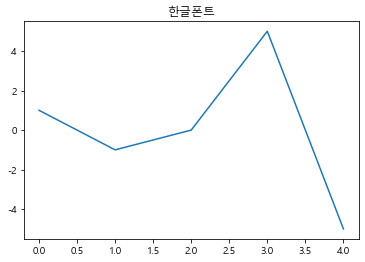

In [3]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

In [4]:
#custid 분석 제외
train = pd.read_csv('train.csv', encoding = 'cp949').set_index('custid')
test = pd.read_csv('test.csv', encoding = 'cp949').set_index('custid')

In [5]:
print(train.shape) # train = 5000 sample, 17 feature / custid' 제외
print(test.shape) # test = 5000 sample, 16 feature / 'custid' 제외

(5000, 17)
(5000, 16)


In [6]:
display(train.head())
display(test.head())

,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
custid,,,,,,,,,,,,,,,,,
18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
custid,,,,,,,,,,,,,,,,
100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품
100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠


In [7]:
df = train.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 18 to 49993
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    4055 non-null   float64
 10  겨울_구매건수    4103 non-null   float64
 11  봄_구매건수     4311 non-null   float64
 12  여름_구매건수    3978 non-null   float64
 13  아침_구매건수    3558 non-null   float64
 14  저녁_구매건수    4033 non-null   float64
 15  점심_구매건수    4855 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 703.1+ KB


In [9]:
#중복 데이터 확인 ----> 중복데이터 없음
#train_dup = all_features.reset_index()
#train_dup = train_dup['custid'].duplicated()
#train_dup.value_counts()

####### 구매코너 대분류? :의미가 있는가?, 분류 기준 모호? 명확하지 않음.

In [10]:
df.loc[(df['주구매코너'] == '영캐주얼') |
       (df['주구매코너'] == '피혁A') |
       (df['주구매코너'] == '유니캐주얼') |
       (df['주구매코너'] == '니트단품') |
       (df['주구매코너'] == '섬유') |
       (df['주구매코너'] == '캐릭터캐주얼') |
       (df['주구매코너'] == '피혁B') |
       (df['주구매코너'] == '엘레강스캐주얼') |
       (df['주구매코너'] == '트래디셔널캐주얼') |
       (df['주구매코너'] == '유아동복') |
       (df['주구매코너'] == '정장셔츠') |
       (df['주구매코너'] == '타운모피'), '코너분류'] = '패션'
        
df.loc[(df['주구매코너'] == '일반식품'), '코너분류'] = '식품'
        
df.loc[(df['주구매코너'] == '가전') |
       (df['주구매코너'] == '조리욕실') |
       (df['주구매코너'] == '가구') |
       (df['주구매코너'] == '도자기크리스탈') |
       (df['주구매코너'] == '침구수예'), '코너분류'] = '생활'
        
df.loc[(df['주구매코너'] == '수입명품') |
       (df['주구매코너'] == '디자이너부띠끄'), '코너분류'] = '고급'
        
df.loc[(df['주구매코너'] == '화장품') |
       (df['주구매코너'] == '스포츠') |
       (df['주구매코너'] == '장신구'), '코너분류'] = '잡화'

df.loc[(df['주구매코너'] == '문화완구') |
       (df['주구매코너'] == '기타바이어'), '코너분류'] = '기타'

In [11]:
df.head()

,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너분류
custid,,,,,,,,,,,,,,,,,,
18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품,잡화
21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼,패션
23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구,잡화
26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품,잡화
35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A,패션


In [12]:
df['주구매코너'].value_counts()

일반식품        1306
화장품         1206
유니캐주얼        410
유아동복         383
스포츠          301
영캐주얼         246
캐릭터캐주얼       188
수입명품         136
섬유            96
트래디셔널캐주얼      91
니트단품          91
정장셔츠          90
엘레강스캐주얼       78
피혁A           75
장신구           68
피혁B           56
디자이너부띠끄       51
문화완구          38
조리욕실          28
가전            18
기타바이어         12
도자기크리스탈       11
침구수예           8
가구             7
타운모피           6
Name: 주구매코너, dtype: int64

#### df['내점구매율'] 추가

In [13]:
df['내점구매율'] = np.round(df['구매건수'] /df['내점일수'], 2)
df.head()

,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너분류,내점구매율
custid,,,,,,,,,,,,,,,,,,,
18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품,잡화,1.50
21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼,패션,1.12
23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구,잡화,2.25
26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품,잡화,2.00
35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A,패션,2.50


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 18 to 49993
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    4055 non-null   float64
 10  겨울_구매건수    4103 non-null   float64
 11  봄_구매건수     4311 non-null   float64
 12  여름_구매건수    3978 non-null   float64
 13  아침_구매건수    3558 non-null   float64
 14  저녁_구매건수    4033 non-null   float64
 15  점심_구매건수    4855 non-null   float64
 16  주구매코너      5000 non-null   object 
 17  코너분류       5000 non-null   object 
 18  내점구매율      5000 non-null   float64
dtypes: float64(11), int64(6), object(2)
memory usa

###obj, num 구분 후, 결측치 처리

In [15]:
obj = df.dtypes[df.dtypes == 'object'].index
num = df.dtypes[df.dtypes != 'object'].index

In [16]:
display(obj)
display(num)

Index(['주구매코너', '코너분류'], dtype='object')

Index(['gender', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류', '내점일수',
       '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수', '여름_구매건수',
       '아침_구매건수', '저녁_구매건수', '점심_구매건수', '내점구매율'],
      dtype='object')

In [17]:
df.isnull().sum()

gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
코너분류            0
내점구매율           0
dtype: int64

In [18]:
#null 값 있는 컬럼
null_col = df.iloc[:,9:-3]
null_col = null_col.columns

In [19]:
df[null_col].head()

,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
custid,,,,,,,
18,NaN,9.0,6.0,NaN,NaN,6.0,9.0
21,NaN,5.0,4.0,NaN,3.0,NaN,6.0
23,7.0,17.0,12.0,NaN,10.0,11.0,15.0
26,5.0,8.0,15.0,NaN,NaN,18.0,10.0
35,NaN,NaN,5.0,NaN,NaN,5.0,NaN


In [20]:
#all_features['사계절 합'] = all_features.iloc[:,8:12].sum(axis=1)
#all_features['일일 합'] = all_features.iloc[:,12:15].sum(axis=1)
#all_features.head()
#all_features = all_features.drop('구매건수 차', axis=1)
#all_features['구매건수 차'] = all_features['구매건수'] - all_features['일일 합']
#all_features['구매건수 차'].value_counts()

In [21]:
#null 값 -> 0 입력, 총구매건수와 차이 없음
df[null_col] = df[null_col].fillna(0)
df.isnull().sum()

gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
코너분류         0
내점구매율        0
dtype: int64

In [22]:
#obj -> 수치형 변환
df[obj] = df[obj].apply(lambda x: x.astype('category').cat.codes)
df.shape

(5000, 19)

In [23]:
df.head(3)

,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너분류,내점구매율
custid,,,,,,,,,,,,,,,,,,,
18,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,9.0,6.0,0.0,0.0,6.0,9.0,24,4,1.50
21,0,353450,9,39272,1.2,6,8,11.1,37.5,0.0,5.0,4.0,0.0,3.0,0.0,6.0,11,5,1.12
23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,0.0,10.0,11.0,15.0,15,4,2.25


#참고 https://ko.d2l.ai/chapter_deep-learning-basics/kaggle-house-price.html

#check skewness, Kurtosis
왜도 (Skewness)
- 분포의 비대칭도.
- 정규분포 = 왜도 0
- 왼쪽으로 치우침 = 왜도 > 0
- 오른쪽으로 치우침 = 왜도 < 0
정규분포의 왜도는 0이다. 최대값에 대한 정보가 없으면 계산된 왜도는 신뢰성 떨어짐

첨도 (Kurtosis)
- 확률분포의 뾰족한 정도.
- 정규분포 = 첨도 0(Pearson 첨도 = 3)
- 위로 뾰족함 = 첨도 > 0(Pearson 첨도 >3)
- 아래로 뾰족함 = 첨도 < 0 (Pearson 첨도 < 3)


- 참고 https://www.kaggle.com/fkstepz/step-by-step-predict-bike-sharing-demand

In [24]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew

In [25]:
num

Index(['gender', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류', '내점일수',
       '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수', '여름_구매건수',
       '아침_구매건수', '저녁_구매건수', '점심_구매건수', '내점구매율'],
      dtype='object')

In [26]:
skewed_f = df[num].apply(lambda x: skew(x.dropna ())
                                ).sort_values(ascending = False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' : skewed_f})
skewness


Skew in numerical features: 



,Skew
총구매액,5.781570
아침_구매건수,4.917130
저녁_구매건수,4.482165
점심_구매건수,3.610048
평균구매가격,3.148305
여름_구매건수,3.123849
구매건수,3.059414
내점일수,3.011361
가을_구매건수,2.983893
봄_구매건수,2.797174


In [27]:
skewness = skewness[abs(skewness) > 0]
skewness

,Skew
총구매액,5.781570
아침_구매건수,4.917130
저녁_구매건수,4.482165
점심_구매건수,3.610048
평균구매가격,3.148305
여름_구매건수,3.123849
구매건수,3.059414
내점일수,3.011361
가을_구매건수,2.983893
봄_구매건수,2.797174


In [28]:
#수치형 변수의 왜도, 첨도 확인
for col in num:
    print('{:15}'.format(col),
          'Skewness: {:05.2f}'.format(df[col].skew()),
          '      ',
          'Kurtosis: {:06.2f}'.format(df[col].kurt()))

gender          Skewness: 00.85        Kurtosis: -01.28
총구매액            Skewness: 05.78        Kurtosis: 060.23
구매건수            Skewness: 03.06        Kurtosis: 015.61
평균구매가격          Skewness: 03.15        Kurtosis: 016.48
평균할부개월수         Skewness: 02.27        Kurtosis: 012.85
구매브랜드종류         Skewness: 01.74        Kurtosis: 004.58
내점일수            Skewness: 03.01        Kurtosis: 015.62
수입상품_구매비율       Skewness: 02.11        Kurtosis: 005.37
주말방문비율          Skewness: 00.63        Kurtosis: 000.17
가을_구매건수         Skewness: 02.98        Kurtosis: 014.64
겨울_구매건수         Skewness: 02.73        Kurtosis: 011.73
봄_구매건수          Skewness: 02.80        Kurtosis: 012.21
여름_구매건수         Skewness: 03.12        Kurtosis: 016.05
아침_구매건수         Skewness: 04.92        Kurtosis: 040.45
저녁_구매건수         Skewness: 04.48        Kurtosis: 033.04
점심_구매건수         Skewness: 03.61        Kurtosis: 023.48
내점구매율           Skewness: 01.42        Kurtosis: 004.00


<AxesSubplot:xlabel='총구매액', ylabel='Density'>

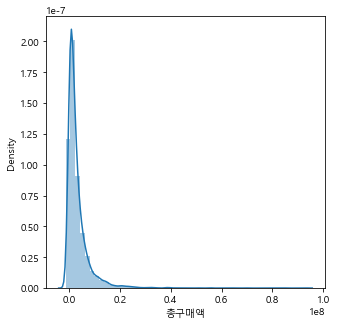

In [29]:
#왜도, 첨도 시각적 확인
f, ax = plt.subplots(figsize=(5,5))
sns.distplot(df['총구매액'])

Skewness: -0.403897
Kurtosis: 0.167335


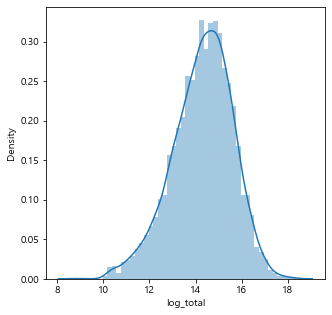

In [30]:
df['log_total'] = np.log1p(df['총구매액'])
f, ax = plt.subplots(figsize = (5,5))
sns.distplot(df['log_total'])
print('Skewness: {:3f}'.format(df['log_total'].skew()))
print('Kurtosis: {:3f}'.format(df['log_total'].kurt()))
#{: 숫자f} 숫자만큼의 공백 

##Log를 취해준 변수의 
- Skewness와 Kurtosis가 많이 떨어짐 (왜도, 첨도)
- plot 자체도 나름 정규 근사화가 된 것???



출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG]

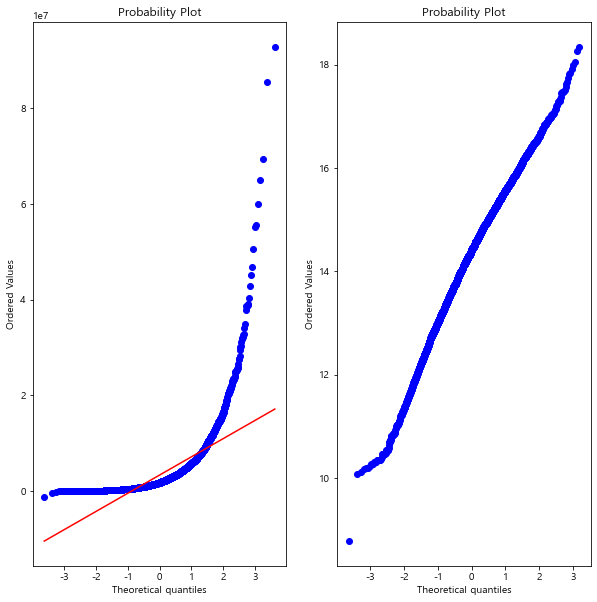

In [31]:
from scipy import stats
fig = plt.figure(figsize = (10,10))
fig.add_subplot(1,2,1)
res = stats.probplot(df['총구매액'],plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(df['log_total'],plot=plt)
## 그래프상 휘어짐이 줄었음 -> 정규분포에 가까운 ???

In [32]:
df.head()

,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너분류,내점구매율,log_total
custid,,,,,,,,,,,,,,,,,,,,
18,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,9.0,6.0,0.0,0.0,6.0,9.0,24,4,1.50,13.429997
21,0,353450,9,39272,1.2,6,8,11.1,37.5,0.0,5.0,4.0,0.0,3.0,0.0,6.0,11,5,1.12,12.775500
23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,0.0,10.0,11.0,15.0,15,4,2.25,15.550947
26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,0.0,0.0,18.0,10.0,24,4,2.00,14.490494
35,0,885000,5,177000,6.0,5,2,0.0,100.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,22,5,2.50,13.693344


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'총구매액'}>,
        <AxesSubplot:title={'center':'구매건수'}>,
        <AxesSubplot:title={'center':'평균구매가격'}>],
       [<AxesSubplot:title={'center':'평균할부개월수'}>,
        <AxesSubplot:title={'center':'구매브랜드종류'}>,
        <AxesSubplot:title={'center':'내점일수'}>,
        <AxesSubplot:title={'center':'수입상품_구매비율'}>],
       [<AxesSubplot:title={'center':'주말방문비율'}>,
        <AxesSubplot:title={'center':'가을_구매건수'}>,
        <AxesSubplot:title={'center':'겨울_구매건수'}>,
        <AxesSubplot:title={'center':'봄_구매건수'}>],
       [<AxesSubplot:title={'center':'여름_구매건수'}>,
        <AxesSubplot:title={'center':'아침_구매건수'}>,
        <AxesSubplot:title={'center':'저녁_구매건수'}>,
        <AxesSubplot:title={'center':'점심_구매건수'}>],
       [<AxesSubplot:title={'center':'주구매코너'}>,
        <AxesSubplot:title={'center':'코너분류'}>,
        <AxesSubplot:title={'center':'내점구매율'}>,
        <AxesSubplot:title={'center':'log_total'}>]], dtype=obje

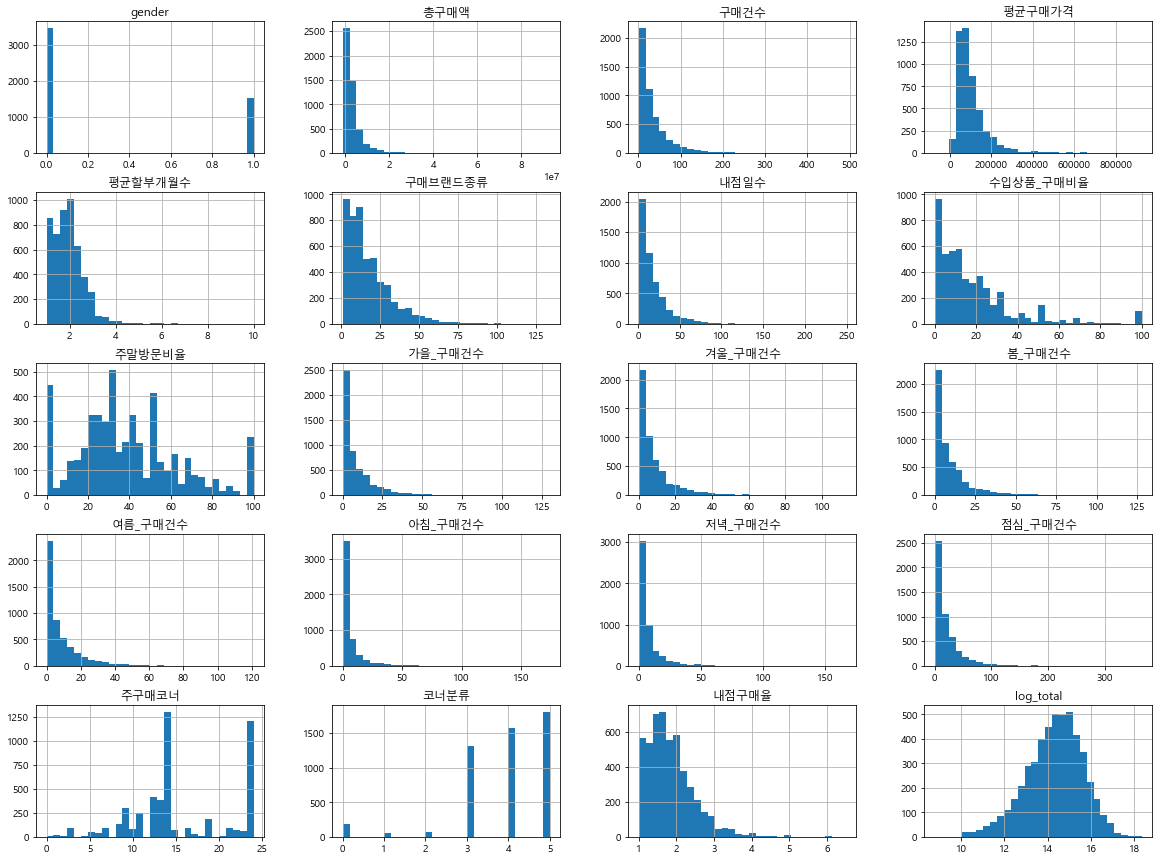

In [33]:
df.hist(bins=30, figsize=(20,15))

<AxesSubplot:>

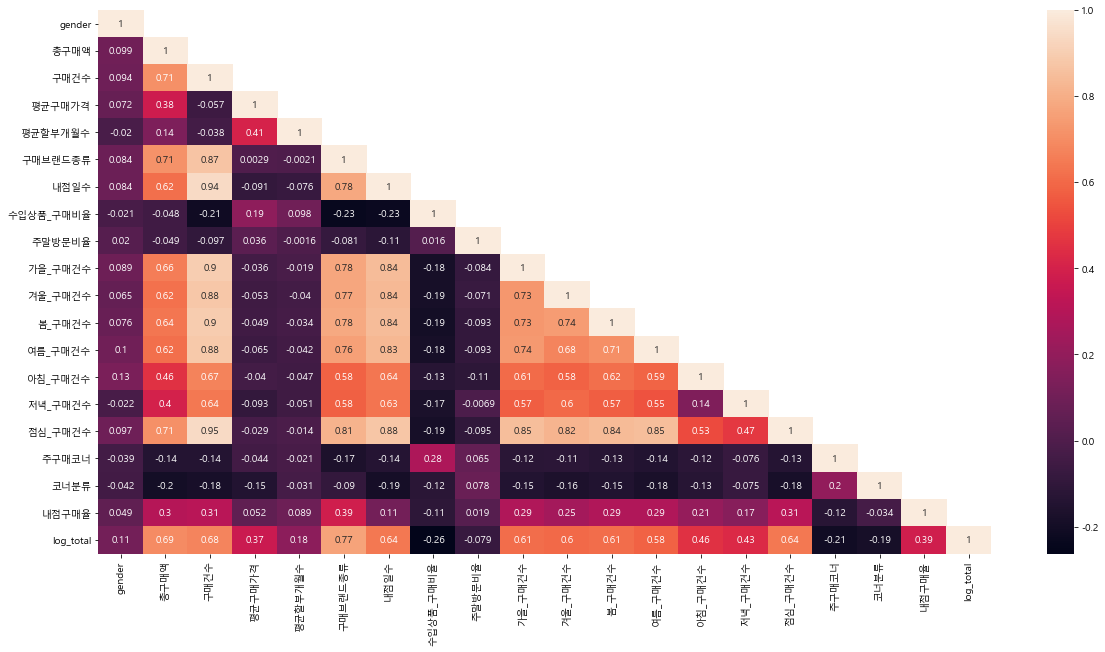

In [34]:
corr=df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, mask=mask, vmax=1.,annot=True)

## 참고 사이트
# https://www.kaggle.com/fkstepz/step-by-step-predict-bike-sharing-demand

In [75]:
df.describe()

,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너분류,내점구매율,log_total,구매등급
count,5000.000000,5.000000e+03,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.304200,3.360421e+06,34.538400,102564.0746,1.915660,17.368800,18.054800,17.989860,38.571880,8.248000,...,9.115600,9.041200,6.175600,7.429000,20.933800,15.509000,3.892400,1.838784,14.300675,1.388000
std,0.460114,5.088433e+06,40.109424,79091.0458,0.730558,14.582432,19.369182,19.483598,24.509818,10.941647,...,11.498917,12.190981,11.438782,11.674511,26.347058,5.936242,1.165287,0.622667,1.300819,1.134422
min,0.000000,-1.237971e+06,1.000000,-72822.0000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.779711,0.000000
25%,0.000000,7.223850e+05,10.000000,54811.0000,1.400000,7.000000,6.000000,5.000000,22.200000,1.000000,...,2.000000,1.000000,0.000000,1.000000,5.000000,12.000000,3.000000,1.407500,13.495268,1.000000
50%,0.000000,1.806748e+06,21.000000,82201.5000,1.800000,13.000000,12.000000,12.500000,34.850000,4.000000,...,5.000000,5.000000,2.000000,4.000000,12.000000,14.000000,4.000000,1.730000,14.407040,1.000000
75%,1.000000,4.030409e+06,44.000000,124142.7500,2.200000,24.000000,23.000000,25.000000,50.000000,11.000000,...,12.000000,12.000000,7.000000,9.000000,27.000000,23.000000,5.000000,2.140000,15.209379,3.000000
max,1.000000,9.286883e+07,491.000000,926117.0000,10.000000,134.000000,249.000000,100.000000,100.000000,130.000000,...,128.000000,121.000000,174.000000,167.000000,366.000000,24.000000,5.000000,6.500000,18.346699,3.000000


In [76]:
df.head()

,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너분류,내점구매율,log_total,구매등급
custid,,,,,,,,,,,,,,,,,,,,,
18,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,...,6.0,0.0,0.0,6.0,9.0,24,4,1.50,13.429997,1
21,0,353450,9,39272,1.2,6,8,11.1,37.5,0.0,...,4.0,0.0,3.0,0.0,6.0,11,5,1.12,12.775500,3
23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,...,12.0,0.0,10.0,11.0,15.0,15,4,2.25,15.550947,2
26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,...,15.0,0.0,0.0,18.0,10.0,24,4,2.00,14.490494,1
35,0,885000,5,177000,6.0,5,2,0.0,100.0,0.0,...,5.0,0.0,0.0,5.0,0.0,22,5,2.50,13.693344,3


In [77]:
df.dtypes

gender         int64
총구매액           int64
구매건수           int64
평균구매가격         int64
평균할부개월수      float64
구매브랜드종류        int64
내점일수           int64
수입상품_구매비율    float64
주말방문비율       float64
가을_구매건수      float64
겨울_구매건수      float64
봄_구매건수       float64
여름_구매건수      float64
아침_구매건수      float64
저녁_구매건수      float64
점심_구매건수      float64
주구매코너           int8
코너분류            int8
내점구매율        float64
log_total    float64
구매등급            int8
dtype: object

In [37]:
# 구매등급을오 분류? 뭘 기준으로..IQR?

In [78]:
Q1=df['구매건수'].quantile(.25)
Q3 =df['구매건수'].quantile(.75)
IQR = Q3-Q1
Q2 = df['구매건수'].quantile(.5)
Q4 = df['구매건수'].quantile(1)

print("Q1 =",Q1)
print("Q3 =",Q3)
print("IQR =",IQR)
print("Q2 =",Q2)
print("Q4 =",Q4)

Q1 = 10.0
Q3 = 44.0
IQR = 34.0
Q2 = 21.0
Q4 = 491.0


In [39]:
def pur(x):
    구매등급= ''
    if x <= Q1 : 구매등급='white'
    elif x <= IQR : 구매등급='red'
    elif x <= Q3 : 구매등급='silver'
    else: 구매등급='gold'

    return 구매등급

df['구매등급'] = df['구매건수'].apply(lambda x : pur(x))

In [40]:
df['구매등급'].value_counts()

red       1948
white     1378
gold      1245
silver     429
Name: 구매등급, dtype: int64

<AxesSubplot:xlabel='구매등급', ylabel='총구매액'>

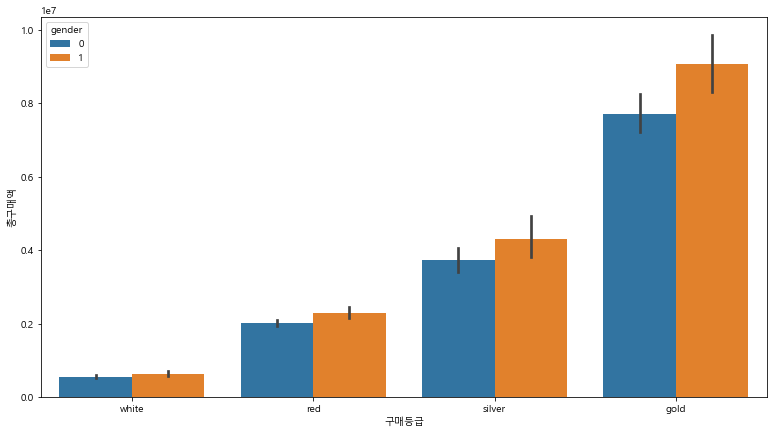

In [41]:
plt.figure(figsize=(13, 7))
names = ['white', 'red', 'silver', 'gold']

sns.barplot(data=df, x='구매등급', y='총구매액', order=names, hue='gender') #order : x축 순서

In [42]:
df['구매건수'].value_counts()

3      157
4      154
5      146
9      146
2      140
      ... 
269      1
353      1
389      1
417      1
491      1
Name: 구매건수, Length: 223, dtype: int64

In [43]:
# 전처리한 결과를 CSV파일로 보존
df.to_csv('hdf.csv', index=True)

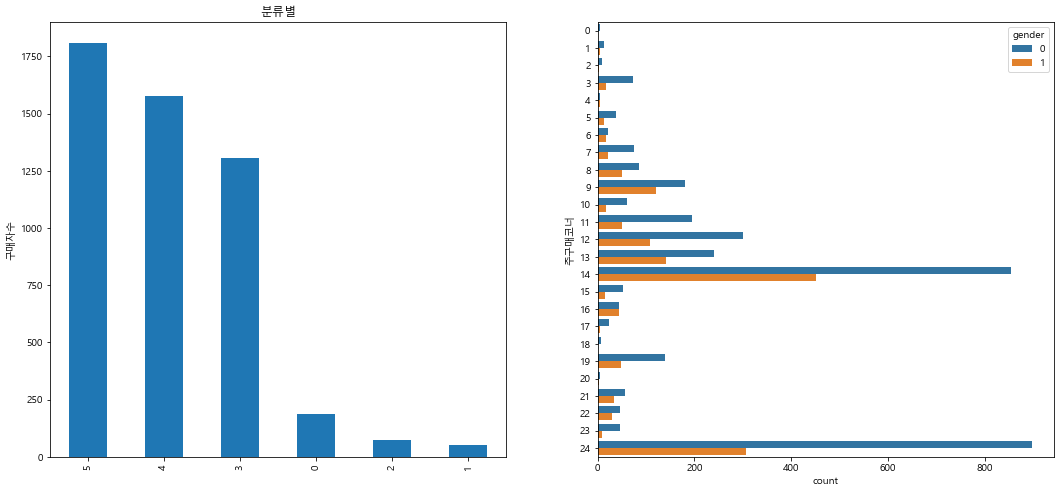

In [44]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df['코너분류'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('분류별')
ax[0].set_ylabel('구매자수')
sns.countplot(y='주구매코너', hue='gender', data=df, ax=ax[1])
plt.show()

In [45]:
#type 변경
obj = df.dtypes[df.dtypes == 'object'].index
num = df.dtypes[df.dtypes != 'object'].index
obj

Index(['구매등급'], dtype='object')

In [46]:
df.head()

,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너분류,내점구매율,log_total,구매등급
custid,,,,,,,,,,,,,,,,,,,,,
18,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,...,6.0,0.0,0.0,6.0,9.0,24,4,1.50,13.429997,red
21,0,353450,9,39272,1.2,6,8,11.1,37.5,0.0,...,4.0,0.0,3.0,0.0,6.0,11,5,1.12,12.775500,white
23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,...,12.0,0.0,10.0,11.0,15.0,15,4,2.25,15.550947,silver
26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,...,15.0,0.0,0.0,18.0,10.0,24,4,2.00,14.490494,red
35,0,885000,5,177000,6.0,5,2,0.0,100.0,0.0,...,5.0,0.0,0.0,5.0,0.0,22,5,2.50,13.693344,white


In [47]:
#? log_total에 왜 nan?
df['log_total'].value_counts()
df['log_total'].fillna(df['log_total'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 18 to 49993
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   int8   
 17  코너분류       5000 non-null   int8   
 18  내점구매율      5000 non-null   float64
 19  log_total  5000 non-null   float64
 20  구매등급  

In [48]:
#구매등급 변환
df[obj] = df[obj].apply(lambda x: x.astype('category').cat.codes)

### 모델링-1

In [79]:
#훈련세트, 테스트세트 나누기
from sklearn.model_selection import train_test_split
dfX = df.drop(['gender'], axis=1) 
dfy = df['gender']
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 41322 to 27783
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총구매액       3750 non-null   int64  
 1   구매건수       3750 non-null   int64  
 2   평균구매가격     3750 non-null   int64  
 3   평균할부개월수    3750 non-null   float64
 4   구매브랜드종류    3750 non-null   int64  
 5   내점일수       3750 non-null   int64  
 6   수입상품_구매비율  3750 non-null   float64
 7   주말방문비율     3750 non-null   float64
 8   가을_구매건수    3750 non-null   float64
 9   겨울_구매건수    3750 non-null   float64
 10  봄_구매건수     3750 non-null   float64
 11  여름_구매건수    3750 non-null   float64
 12  아침_구매건수    3750 non-null   float64
 13  저녁_구매건수    3750 non-null   float64
 14  점심_구매건수    3750 non-null   float64
 15  주구매코너      3750 non-null   int8   
 16  코너분류       3750 non-null   int8   
 17  내점구매율      3750 non-null   float64
 18  log_total  3750 non-null   float64
 19  구매등급       3750 non-null   int8   
dtypes: 

In [86]:
dec_tree = DecisionTreeClassifier(max_depth=8, random_state=0)

dec_tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(dec_tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(dec_tree.score(X_test, y_test)))

훈련 세트 정확도: 0.771
테스트 세트 정확도: 0.650


In [87]:
svm = SVC(C=100)
svm.fit(X_train, y_train).score(X_test, y_test)
print("훈련 세트 정확도: {:.3f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도: 0.696
테스트 세트 정확도: 0.706


In [106]:
knb = KNeighborsClassifier(n_neighbors = 50)
knb.fit(X_train, y_train).score(X_test, y_test)
print("훈련 세트 정확도: {:.3f}".format(knb.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(knb.score(X_test, y_test)))

훈련 세트 정확도: 0.690
테스트 세트 정확도: 0.702


In [88]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train).score(X_test, y_test)
print("훈련 세트 정확도: {:.3f}".format(xgb.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xgb.score(X_test, y_test)))

[02:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 세트 정확도: 0.993
테스트 세트 정확도: 0.647


In [109]:
xgb= XGBClassifier()
xgb_param_grid = {
    'n_estimators' : [50, 100, 200, 400, 600],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15],
    'max_depth' : [4, 6, 8, 10]
}

xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, scoring='accuracy', n_jobs= -1, verbose= 1)
xgb_grid.fit(X_train, y_train)    

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.2min


KeyboardInterrupt: 

In [108]:
print("Best 평균 정확도: {:.3f}".format(xgb_grid.best_score_))
print("Best 파라미터: ",format(xgb_grid.best_params_))

Best 평균 정확도: 0.694
Best 파라미터:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}


##### 데이터 불균형 

In [58]:
df['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [59]:
# Evaluating the Algorithm
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))

In [60]:
## 선택?
X_sm, Y_sm = SMOTETomek().fit_sample(X_train, Y_train)
sample_tree = DecisionTreeClassifier(max_depth=8, random_state=0)
sample_tree.fit(X_sm, Y_sm)
Y_pred_sp = sample_tree.predict(X_test)

print(classification_report(Y_test, Y_pred_sp))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       883
           1       0.34      0.40      0.37       367

    accuracy                           0.60      1250
   macro avg       0.54      0.54      0.54      1250
weighted avg       0.62      0.60      0.60      1250



In [61]:
X_sm, Y_sm = SMOTETomek().fit_sample(X_train, Y_train)
sample_random = RandomForestClassifier(max_depth=8, random_state=0)
sample_random.fit(X_sm, Y_sm)
Y_pred_spran = sample_random.predict(X_test)
print(classification_report(Y_test, Y_pred_spran))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       883
           1       0.36      0.37      0.36       367

    accuracy                           0.62      1250
   macro avg       0.54      0.55      0.55      1250
weighted avg       0.62      0.62      0.62      1250



In [62]:
#X_sm, Y_sm = SMOTEENN().fit_sample(X_train, Y_train)
#se_random = DecisionTreeClassifier(max_depth=20, random_state=0)
#se_random.fit(X_sm, Y_sm)
#Y_pred_se = sample_random.predict(X_test)
#print(classification_report(Y_test, Y_pred_se))

In [63]:
X_to, Y_to = TomekLinks().fit_sample(X_train, Y_train) #under-Sampling
under_tree = DecisionTreeClassifier(max_depth=6, random_state=0)
under_tree.fit(X_to, Y_to)
Y_pred_un = under_tree.predict(X_test)
print(classification_report(Y_test, Y_pred_un))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77       883
           1       0.32      0.20      0.24       367

    accuracy                           0.64      1250
   macro avg       0.52      0.51      0.50      1250
weighted avg       0.60      0.64      0.61      1250



In [64]:
X_to, Y_to = TomekLinks().fit_sample(X_train, Y_train)
under_random =RandomForestClassifier(max_depth=6, random_state=0)
under_random.fit(X_to, Y_to)
Y_pred_random = under_random.predict(X_test)
print(classification_report(Y_test, Y_pred_random))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81       883
           1       0.40      0.10      0.16       367

    accuracy                           0.69      1250
   macro avg       0.56      0.52      0.49      1250
weighted avg       0.62      0.69      0.62      1250



In [65]:
##모델링-2

In [66]:
df.to_csv('hdf.csv', index=True)

In [67]:
df_new = pd.read_csv('hdf.csv')
df_new.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너분류,내점구매율,log_total,구매등급
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,6.0,0.0,0.0,6.0,9.0,24,4,1.50,13.429997,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,4.0,0.0,3.0,0.0,6.0,11,5,1.12,12.775500,3
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,12.0,0.0,10.0,11.0,15.0,15,4,2.25,15.550947,2
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,15.0,0.0,0.0,18.0,10.0,24,4,2.00,14.490494,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,5.0,0.0,0.0,5.0,0.0,22,5,2.50,13.693344,3


In [68]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   int64  
 18  코너분류       5000 non-null   int64  
 19  내점구매율      5000 non-null   float64
 20  log_tota

In [91]:
# 데이터 세트를 설명변수와 목적변수로 분할
X = np.array(df_new.drop('gender', axis=1))
Y = np.array(df_new['gender'])
X_resampled, y_resampled = SMOTETomek(random_state=0).fit_sample(X, Y)

# y가 1과 0인 데이터의 건수를 카운트
print(np.sum(Y == 1), np.sum(Y == 0))

scaler = StandardScaler()
#X_scale = scaler.fit_transform(X_resampled)
X, Y = scaler.fit_resample(X, Y)

# y가 1과 0인 데이터 건수를카운트
print(np.sum(Y == 1), np.sum(Y == 0))

1521 3479


AttributeError: 'StandardScaler' object has no attribute 'fit_resample'

In [ ]:
df_new.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)
print(dfX.shape, X_resampled.shape, X_train.shape, X_test.shape)esampled

In [ ]:
X_resampled.head()

In [ ]:
dec_tree = DecisionTreeClassifier(max_depth=8, random_state=0)
dec_tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(dec_tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(dec_tree.score(X_test, y_test)))

In [ ]:
xgb= XGBClassifier()
xgb_param_grid = {
    'n_estimators' : [50, 100, 200, 400],
    'learning_rate' : [0.01, 0.05, 0.1],
    'max_depth' : [4, 6, 8]
}
xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, scoring='accuracy', n_jobs= -1, verbose= 1)
xgb_grid.fit(X_train, y_train)    

In [ ]:
print("Best 평균 정확도: {:.3f}".format(xgb_grid.best_score_))
print("Best 파라미터: ",format(xgb_grid.best_params_))

In [ ]:
lgb = LGBMClassifier(boosting_type='gbdt', calss_weight=None, colsample_bytree=1.0,
         importance_type='split', lambda_l1=0.01, lambda_l2=0,
         learning_rate=0.01, max_depth=50, metric='auc',
         min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
         min_split_gain=0.0, n_estimators=300, n_jobs=-1,
         num_boost_round=4000, num_leaves=150, objective='binary',
         random_state=0, reg_alpha=0.1, reg_lambda=0.0, silent=True,
         subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

lgb.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(lgb.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(lgb.score(X_test, y_test)))

In [ ]:
lgb= LGBMClassifier()
lgb_param_grid = {
    'n_estimators' : [50, 100, 200, 400],
    'learning_rate' : [0.01, 0.05, 0.1],
    'max_depth' : [4, 6, 8]
}
lgb_grid = GridSearchCV(xgb, param_grid=lgb_param_grid, scoring='accuracy', n_jobs= -1, verbose= 1)
lgb_grid.fit(X_train, y_train)    

In [ ]:
print("Best 평균 정확도: {:.3f}".format(lgb_grid.best_score_))
print("Best 파라미터: ",format(lgb_grid.best_params_))

In [ ]:
#from sklearn.dummy import DummyClassifier
#print(Y_test.value_counts())
#DummyClassifier(strategy='most_frequent').fit(X_train, Y_train).score(X_test, Y_test)

#K-검정

In [ ]:
from sklearn.feature_selection import SelectKBest

# 특징량을 n개 선택
selector = SelectKBest(k=8) 
selector.fit(X, Y)
mask = selector.get_support()

# 어느 변수를 선택하였는지 확인
print(df.drop('gender', axis=1).columns)
print(mask)

In [ ]:
train_set.shape
test_set.shape

In [107]:
#참고 http://hleecaster.com/ml-logistic-regression-example/